Using backend: tensorflow.compat.v1

2021-12-13 12:14:31.665913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0072 seconds


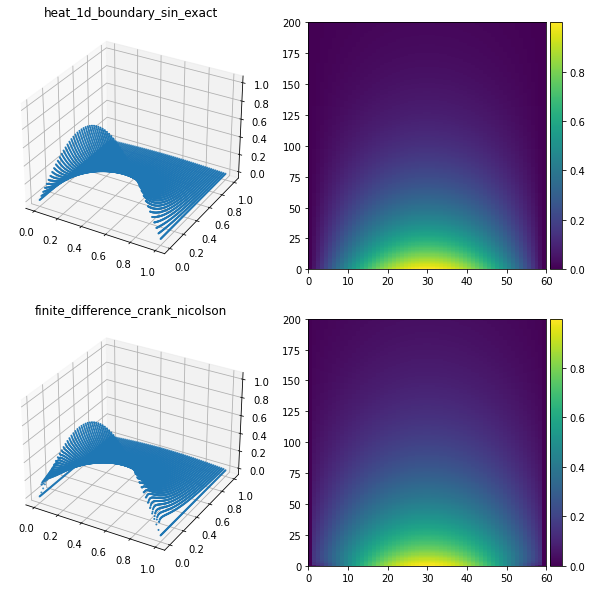

In [1]:
from heat_pinn import *
from project.gen_data import create_xt_grids, gen_solution

TIMER_REPEAT_TIMES = 25

@dataclass
class QuantPinnConstParam(PinnConstParam):
    mean_abs_error_threshold = 0.01
    def __str__(self) -> str:
        rs = super().__str__()
        rs = rs + "mean_abs_error_threshold: {}".format(self.mean_abs_error_threshold)
        return rs

def get_above_threshold(mae_dist_model, threshold):
    filtered = [m for m in mae_dist_model if m[1] >= threshold]
    if len(filtered) == 0:
        return None
    min_mae_dist_model = min(filtered, key=lambda x: float(x[1]))
    return min_mae_dist_model

# Generate constants throughout this app!!
const_params = QuantPinnConstParam()

solve_analytical_and_numerical(const_params)

plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)

In [2]:
hidden_layers = [3, 2, 1]
hidden_layer_sizes = [20, 15, 10, 5, 3]

# # Small test
# hidden_layers = [3]
# hidden_layer_sizes = [20, 15]

plot_results = []
mae_dist_models = []
for layer in hidden_layers:
    size_maes = []
    for size in hidden_layer_sizes:
        test_params = PinnTestParam()
        test_params.nn_hidden_layer_num = layer
        test_params.nn_hidden_layer_size = size
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        size_maes.append(mae)
    plot_results.append([layer, hidden_layer_sizes, size_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.032220 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.646719 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.53e-02, 3.16e-02, 7.52e-01]    [1.62e-02, 3.16e-02, 7.52e-01]    []  


2021-12-13 12:14:34.463975: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-13 12:14:34.484571: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593190000 Hz
2021-12-13 12:14:34.535210: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1000      [1.42e-03, 1.35e-03, 5.03e-04]    [1.00e-03, 1.35e-03, 5.03e-04]    []  
2000      [2.99e-04, 5.76e-05, 2.26e-05]    [2.54e-04, 5.76e-05, 2.26e-05]    []  
3000      [6.42e-05, 3.11e-05, 2.08e-05]    [4.83e-05, 3.11e-05, 2.08e-05]    []  
4000      [2.65e-05, 5.08e-06, 3.61e-06]    [2.06e-05, 5.08e-06, 3.61e-06]    []  
5000      [3.25e-05, 5.36e-06, 2.73e-06]    [2.75e-05, 5.36e-06, 2.73e-06]    []  
6000      [3.21e-04, 6.27e-05, 1.75e-05]    [2.85e-04, 6.27e-05, 1.75e-05]    []  
7000      [1.65e-05, 1.73e-06, 1.00e-06]    [1.28e-05, 1.73e-06, 1.00e-06]    []  
8000      [1.43e-05, 1.37e-06, 7.91e-07]    [1.11e-05, 1.37e-06, 7.91e-07]    []  
9000      [1.54e-05, 4.15e-06, 6.57e-06]    [1.26e-05, 4.15e-06, 6.57e-06]    []  
10000     [1.20e-05, 1.06e-06, 5.86e-07]    [9.13e-06, 1.06e-06, 5.86e-07]    []  
11000     [1.12e-05, 9.72e-07, 5.10e-07]    [8.40e-06, 9.72e-07, 5.10e-07]    []  
12000     [3.88e-05, 3.98e-06, 1.08e-06]    [3.40e-05, 3.98e-06, 1.08e-06]    []  
1300

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.201903 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.82e-01, 8.70e-02, 7.53e-01]    [1.80e-01, 8.70e-02, 7.53e-01]    []  
1000      [2.65e-03, 1.60e-03, 2.46e-03]    [1.14e-03, 1.60e-03, 2.46e-03]    []  
2000      [7.35e-04, 2.12e-04, 2.66e-04]    [4.80e-04, 2.12e-04, 2.66e-04]    []  
3000      [3.92e-04, 1.33e-04, 1.61e-04]    [2.71e-04, 1.33e-04, 1.61e-04]    []  
4000      [2.52e-04, 8.43e-05, 1.05e-04]    [1.75e-04, 8.43e-05, 1.05e-04]    []  
5000      [1.72e-04, 5.32e-05, 6.70e-05]    [1.19e-04, 5.32e-05, 6.70e-05]    []  
6000      [1.18e-04, 3.38e-05, 4.12e-05]    [7.95e-05, 3.38e-05, 4.12e-05]    []  
7000      [9.00e-05, 2.28e-05, 2.50e-05]    [5.93e-05, 2.28e-05, 2.50e-05]    []  
8000      [7.53e-05, 1.72e-05, 1.57e-05]    [4.96e-05, 1.72e-05, 1.57e-05]    []  
9000      [6.48e-05, 1.42e-05, 1.10e-05]    [4.29e-05, 1.42e-05, 1.10e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.212274 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.32e-02, 2.40e-02, 4.29e-01]    [4.14e-02, 2.40e-02, 4.29e-01]    []  
1000      [1.53e-03, 7.29e-04, 7.48e-04]    [9.09e-04, 7.29e-04, 7.48e-04]    []  
2000      [5.47e-04, 6.10e-05, 2.80e-05]    [4.44e-04, 6.10e-05, 2.80e-05]    []  
3000      [2.87e-04, 2.93e-05, 1.09e-05]    [2.44e-04, 2.93e-05, 1.09e-05]    []  
4000      [1.74e-04, 1.88e-05, 7.29e-06]    [1.44e-04, 1.88e-05, 7.29e-06]    []  
5000      [1.30e-04, 1.41e-05, 6.39e-06]    [1.06e-04, 1.41e-05, 6.39e-06]    []  
6000      [1.07e-04, 1.06e-05, 5.50e-06]    [8.70e-05, 1.06e-05, 5.50e-06]    []  
7000      [9.12e-05, 8.19e-06, 4.68e-06]    [7.43e-05, 8.19e-06, 4.68e-06]    []  
8000      [7.92e-05, 6.42e-06, 4.00e-06]    [6.45e-05, 6.42e-06, 4.00e-06]    []  
9000      [7.01e-05, 5.15e-06, 3.47e-06]    [5.76e-05, 5.15e-06, 3.47e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.228668 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.42e-01, 6.74e-02, 4.72e-01]    [2.36e-01, 6.74e-02, 4.72e-01]    []  
1000      [1.33e-02, 2.17e-02, 3.99e-02]    [9.89e-03, 2.17e-02, 3.99e-02]    []  
2000      [6.51e-03, 4.21e-03, 7.00e-03]    [4.57e-03, 4.21e-03, 7.00e-03]    []  
3000      [4.52e-03, 1.45e-03, 2.28e-03]    [3.36e-03, 1.45e-03, 2.28e-03]    []  
4000      [2.62e-03, 8.41e-04, 8.65e-04]    [2.00e-03, 8.41e-04, 8.65e-04]    []  
5000      [1.41e-03, 5.89e-04, 4.21e-04]    [1.01e-03, 5.89e-04, 4.21e-04]    []  
6000      [8.30e-04, 4.32e-04, 2.28e-04]    [5.56e-04, 4.32e-04, 2.28e-04]    []  
7000      [4.32e-04, 2.41e-04, 9.28e-05]    [2.92e-04, 2.41e-04, 9.28e-05]    []  
8000      [2.73e-04, 1.31e-04, 3.61e-05]    [2.04e-04, 1.31e-04, 3.61e-05]    []  
9000      [2.04e-04, 7.67e-05, 1.73e-05]    [1.61e-04, 7.67e-05, 1.73e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.226912 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.40e-01, 8.65e-02, 2.28e-01]    [2.52e-01, 8.65e-02, 2.28e-01]    []  
1000      [1.52e-02, 4.00e-02, 6.96e-02]    [1.29e-02, 4.00e-02, 6.96e-02]    []  
2000      [9.24e-03, 2.97e-03, 3.64e-03]    [6.23e-03, 2.97e-03, 3.64e-03]    []  
3000      [4.49e-03, 5.93e-04, 1.09e-03]    [2.68e-03, 5.93e-04, 1.09e-03]    []  
4000      [2.83e-03, 2.27e-04, 5.40e-04]    [1.72e-03, 2.27e-04, 5.40e-04]    []  
5000      [2.02e-03, 1.26e-04, 3.67e-04]    [1.29e-03, 1.26e-04, 3.67e-04]    []  
6000      [1.55e-03, 9.12e-05, 2.50e-04]    [9.81e-04, 9.12e-05, 2.50e-04]    []  
7000      [1.27e-03, 7.79e-05, 1.97e-04]    [8.15e-04, 7.79e-05, 1.97e-04]    []  
8000      [1.09e-03, 7.18e-05, 1.63e-04]    [7.07e-04, 7.18e-05, 1.63e-04]    []  
9000      [9.68e-04, 6.70e-05, 1.45e-04]    [6.37e-04, 6.70e-05, 1.45e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.208646 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.58e-01, 1.51e-01, 7.77e-01]    [1.56e-01, 1.51e-01, 7.77e-01]    []  
1000      [6.66e-03, 1.50e-02, 2.71e-02]    [4.47e-03, 1.50e-02, 2.71e-02]    []  
2000      [2.62e-03, 6.20e-04, 1.38e-03]    [1.64e-03, 6.20e-04, 1.38e-03]    []  
3000      [3.71e-04, 9.35e-05, 9.39e-05]    [2.61e-04, 9.35e-05, 9.39e-05]    []  
4000      [2.08e-04, 5.39e-05, 3.88e-05]    [1.47e-04, 5.39e-05, 3.88e-05]    []  
5000      [1.40e-04, 3.17e-05, 2.07e-05]    [9.86e-05, 3.17e-05, 2.07e-05]    []  
6000      [1.04e-04, 2.15e-05, 1.35e-05]    [7.23e-05, 2.15e-05, 1.35e-05]    []  
7000      [8.13e-05, 1.42e-05, 8.26e-06]    [5.61e-05, 1.42e-05, 8.26e-06]    []  
8000      [8.41e-05, 2.32e-05, 1.46e-05]    [5.71e-05, 2.32e-05, 1.46e-05]    []  
9000      [5.52e-05, 8.11e-06, 3.95e-06]    [3.81e-05, 8.11e-06, 3.95e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.209592 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.59e+00, 9.15e-01, 8.54e-01]    [1.55e+00, 9.15e-01, 8.54e-01]    []  
1000      [1.47e-02, 3.66e-02, 6.53e-02]    [1.25e-02, 3.66e-02, 6.53e-02]    []  
2000      [7.78e-03, 1.01e-02, 1.74e-02]    [5.29e-03, 1.01e-02, 1.74e-02]    []  
3000      [6.31e-03, 2.85e-03, 4.41e-03]    [4.40e-03, 2.85e-03, 4.41e-03]    []  
4000      [2.69e-03, 1.04e-03, 1.00e-03]    [1.79e-03, 1.04e-03, 1.00e-03]    []  
5000      [1.49e-03, 5.96e-04, 2.34e-04]    [9.77e-04, 5.96e-04, 2.34e-04]    []  
6000      [9.43e-04, 3.30e-04, 8.60e-05]    [6.17e-04, 3.30e-04, 8.60e-05]    []  
7000      [6.40e-04, 9.29e-05, 7.45e-05]    [3.82e-04, 9.29e-05, 7.45e-05]    []  
8000      [3.18e-04, 2.62e-05, 1.23e-05]    [2.01e-04, 2.62e-05, 1.23e-05]    []  
9000      [1.88e-04, 1.03e-05, 4.99e-06]    [1.23e-04, 1.03e-05, 4.99e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.227455 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.59e-01, 1.24e-01, 6.79e-01]    [3.40e-01, 1.24e-01, 6.79e-01]    []  
1000      [1.21e-02, 1.22e-02, 2.80e-02]    [7.19e-03, 1.22e-02, 2.80e-02]    []  
2000      [5.04e-03, 2.93e-03, 4.73e-03]    [3.44e-03, 2.93e-03, 4.73e-03]    []  
3000      [3.55e-03, 1.52e-03, 2.00e-03]    [2.40e-03, 1.52e-03, 2.00e-03]    []  
4000      [1.67e-03, 5.18e-04, 5.82e-04]    [1.02e-03, 5.18e-04, 5.82e-04]    []  
5000      [7.80e-04, 8.73e-05, 1.42e-04]    [5.24e-04, 8.73e-05, 1.42e-04]    []  
6000      [5.06e-04, 5.35e-05, 8.56e-05]    [3.40e-04, 5.35e-05, 8.56e-05]    []  
7000      [3.40e-04, 3.96e-05, 5.29e-05]    [2.29e-04, 3.96e-05, 5.29e-05]    []  
8000      [3.42e-04, 3.36e-05, 3.80e-05]    [2.20e-04, 3.36e-05, 3.80e-05]    []  
9000      [1.76e-04, 2.07e-05, 1.79e-05]    [1.25e-04, 2.07e-05, 1.79e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.230114 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.54e-03, 7.71e-02, 8.60e-01]    [8.60e-03, 7.71e-02, 8.60e-01]    []  
1000      [1.80e-02, 3.12e-02, 6.83e-02]    [1.21e-02, 3.12e-02, 6.83e-02]    []  
2000      [1.06e-02, 1.16e-02, 2.18e-02]    [7.19e-03, 1.16e-02, 2.18e-02]    []  
3000      [9.74e-03, 7.11e-03, 1.13e-02]    [6.57e-03, 7.11e-03, 1.13e-02]    []  
4000      [5.65e-03, 2.75e-03, 2.65e-03]    [3.78e-03, 2.75e-03, 2.65e-03]    []  
5000      [2.51e-03, 6.34e-04, 5.47e-04]    [1.69e-03, 6.34e-04, 5.47e-04]    []  
6000      [1.09e-03, 2.11e-04, 1.11e-04]    [7.30e-04, 2.11e-04, 1.11e-04]    []  
7000      [8.51e-04, 1.30e-04, 4.32e-05]    [6.17e-04, 1.30e-04, 4.32e-05]    []  
8000      [6.86e-04, 9.21e-05, 2.38e-05]    [5.03e-04, 9.21e-05, 2.38e-05]    []  
9000      [5.64e-04, 5.98e-05, 1.59e-05]    [4.09e-04, 5.98e-05, 1.59e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.250316 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.77e+00, 3.51e-01, 1.81e-01]    [1.81e+00, 3.51e-01, 1.81e-01]    []  
1000      [1.94e-02, 6.53e-02, 1.39e-01]    [2.01e-02, 6.53e-02, 1.39e-01]    []  
2000      [3.22e-02, 4.34e-02, 9.64e-02]    [3.04e-02, 4.34e-02, 9.64e-02]    []  
3000      [1.59e-02, 3.78e-02, 7.21e-02]    [1.38e-02, 3.78e-02, 7.21e-02]    []  
4000      [1.02e-02, 2.93e-02, 4.08e-02]    [7.71e-03, 2.93e-02, 4.08e-02]    []  
5000      [1.32e-02, 1.71e-02, 2.70e-02]    [9.05e-03, 1.71e-02, 2.70e-02]    []  
6000      [1.18e-02, 7.69e-03, 1.70e-02]    [7.57e-03, 7.69e-03, 1.70e-02]    []  
7000      [9.19e-03, 4.43e-03, 1.02e-02]    [6.06e-03, 4.43e-03, 1.02e-02]    []  
8000      [7.88e-03, 3.41e-03, 6.83e-03]    [5.55e-03, 3.41e-03, 6.83e-03]    []  
9000      [7.12e-03, 2.70e-03, 4.83e-03]    [5.00e-03, 2.70e-03, 4.83e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.219731 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.72e-01, 1.73e-01, 6.36e-01]    [2.67e-01, 1.73e-01, 6.36e-01]    []  
1000      [1.48e-02, 4.43e-02, 9.91e-02]    [1.25e-02, 4.43e-02, 9.91e-02]    []  
2000      [1.06e-02, 3.58e-02, 5.90e-02]    [8.51e-03, 3.58e-02, 5.90e-02]    []  
3000      [6.50e-03, 2.25e-02, 3.42e-02]    [5.04e-03, 2.25e-02, 3.42e-02]    []  
4000      [9.75e-03, 6.45e-03, 1.57e-02]    [6.91e-03, 6.45e-03, 1.57e-02]    []  
5000      [3.42e-03, 2.44e-03, 4.32e-03]    [2.41e-03, 2.44e-03, 4.32e-03]    []  
6000      [2.90e-03, 1.12e-03, 2.00e-03]    [2.11e-03, 1.12e-03, 2.00e-03]    []  
7000      [2.56e-03, 6.74e-04, 1.30e-03]    [1.88e-03, 6.74e-04, 1.30e-03]    []  
8000      [2.06e-03, 4.58e-04, 8.72e-04]    [1.52e-03, 4.58e-04, 8.72e-04]    []  
9000      [1.75e-03, 3.74e-04, 6.36e-04]    [1.34e-03, 3.74e-04, 6.36e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.232108 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.09e+00, 4.03e-01, 5.51e-01]    [1.07e+00, 4.03e-01, 5.51e-01]    []  
1000      [1.34e-02, 4.53e-02, 1.02e-01]    [1.14e-02, 4.53e-02, 1.02e-01]    []  
2000      [1.00e-02, 3.26e-02, 6.26e-02]    [7.35e-03, 3.26e-02, 6.26e-02]    []  
3000      [6.92e-03, 2.75e-02, 4.18e-02]    [5.13e-03, 2.75e-02, 4.18e-02]    []  
4000      [1.09e-02, 1.59e-02, 2.75e-02]    [8.34e-03, 1.59e-02, 2.75e-02]    []  
5000      [1.05e-02, 8.64e-03, 1.96e-02]    [7.51e-03, 8.64e-03, 1.96e-02]    []  
6000      [6.11e-03, 3.32e-03, 8.63e-03]    [4.31e-03, 3.32e-03, 8.63e-03]    []  
7000      [3.34e-03, 2.16e-03, 3.89e-03]    [2.54e-03, 2.16e-03, 3.89e-03]    []  
8000      [3.56e-03, 1.18e-03, 2.61e-03]    [2.82e-03, 1.18e-03, 2.61e-03]    []  
9000      [3.30e-03, 8.15e-04, 2.01e-03]    [2.65e-03, 8.15e-04, 2.01e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.234276 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.22e-02, 3.23e-02, 3.91e-01]    [1.26e-02, 3.23e-02, 3.91e-01]    []  
1000      [1.48e-02, 3.15e-02, 5.25e-02]    [1.20e-02, 3.15e-02, 5.25e-02]    []  
2000      [1.46e-02, 2.11e-02, 3.73e-02]    [1.18e-02, 2.11e-02, 3.73e-02]    []  
3000      [1.33e-02, 1.70e-02, 3.10e-02]    [1.09e-02, 1.70e-02, 3.10e-02]    []  
4000      [7.37e-03, 2.79e-03, 8.74e-03]    [5.45e-03, 2.79e-03, 8.74e-03]    []  
5000      [4.57e-03, 1.47e-03, 3.40e-03]    [3.39e-03, 1.47e-03, 3.40e-03]    []  
6000      [3.50e-03, 1.34e-03, 2.66e-03]    [2.70e-03, 1.34e-03, 2.66e-03]    []  
7000      [2.03e-03, 1.10e-03, 1.64e-03]    [1.50e-03, 1.10e-03, 1.64e-03]    []  
8000      [1.90e-03, 8.56e-04, 1.16e-03]    [1.38e-03, 8.56e-04, 1.16e-03]    []  
9000      [1.82e-03, 7.40e-04, 9.91e-04]    [1.26e-03, 7.40e-04, 9.91e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.235202 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.97e-01, 7.69e-02, 2.85e-01]    [1.86e-01, 7.69e-02, 2.85e-01]    []  
1000      [1.83e-02, 4.13e-02, 7.94e-02]    [1.62e-02, 4.13e-02, 7.94e-02]    []  
2000      [1.88e-02, 3.86e-02, 6.90e-02]    [1.63e-02, 3.86e-02, 6.90e-02]    []  
3000      [1.93e-02, 3.22e-02, 6.04e-02]    [1.66e-02, 3.22e-02, 6.04e-02]    []  
4000      [1.70e-02, 1.96e-02, 4.29e-02]    [1.50e-02, 1.96e-02, 4.29e-02]    []  
5000      [1.44e-02, 1.02e-02, 2.59e-02]    [1.17e-02, 1.02e-02, 2.59e-02]    []  
6000      [1.32e-02, 7.44e-03, 2.08e-02]    [1.04e-02, 7.44e-03, 2.08e-02]    []  
7000      [8.81e-03, 6.12e-03, 1.45e-02]    [6.71e-03, 6.12e-03, 1.45e-02]    []  
8000      [8.04e-03, 5.55e-03, 1.15e-02]    [6.29e-03, 5.55e-03, 1.15e-02]    []  
9000      [7.32e-03, 5.42e-03, 1.05e-02]    [5.74e-03, 5.42e-03, 1.05e-02]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.245254 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.68e-01, 3.00e-01, 5.57e-01]    [6.37e-01, 3.00e-01, 5.57e-01]    []  
1000      [1.83e-02, 5.39e-02, 1.08e-01]    [1.52e-02, 5.39e-02, 1.08e-01]    []  
2000      [1.81e-02, 4.50e-02, 9.05e-02]    [1.56e-02, 4.50e-02, 9.05e-02]    []  
3000      [1.64e-02, 4.02e-02, 7.83e-02]    [1.39e-02, 4.02e-02, 7.83e-02]    []  
4000      [9.57e-03, 3.52e-02, 6.17e-02]    [7.56e-03, 3.52e-02, 6.17e-02]    []  
5000      [9.96e-03, 3.02e-02, 4.79e-02]    [8.22e-03, 3.02e-02, 4.79e-02]    []  
6000      [1.47e-02, 2.50e-02, 4.32e-02]    [1.26e-02, 2.50e-02, 4.32e-02]    []  
7000      [1.96e-02, 1.88e-02, 3.84e-02]    [1.70e-02, 1.88e-02, 3.84e-02]    []  
8000      [2.36e-02, 1.40e-02, 3.41e-02]    [2.08e-02, 1.40e-02, 3.41e-02]    []  
9000      [2.54e-02, 1.18e-02, 3.15e-02]    [2.24e-02, 1.18e-02, 3.15e-02]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20035     [2.45e-02, 9.33e-03, 2.68e-02]    [2.18e-02, 9.33e-03, 2.68e-02]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.060653
  Number of iterations: 1
  Number of functions evaluations: 15
20050     [2.45e-02, 9.33e-03, 2.68e-02]    [2.18e-02, 9.33e-03, 2.68e-02]    []  

Best model at step 20035:
  train loss: 6.07e-02
  test loss: 5.79e-02
  test metric: []

'train' took 1.212173 s

PINN prediction: Average time with 25 tries: 0.0160 seconds


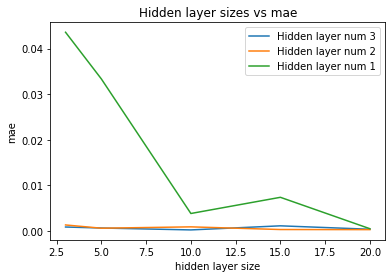

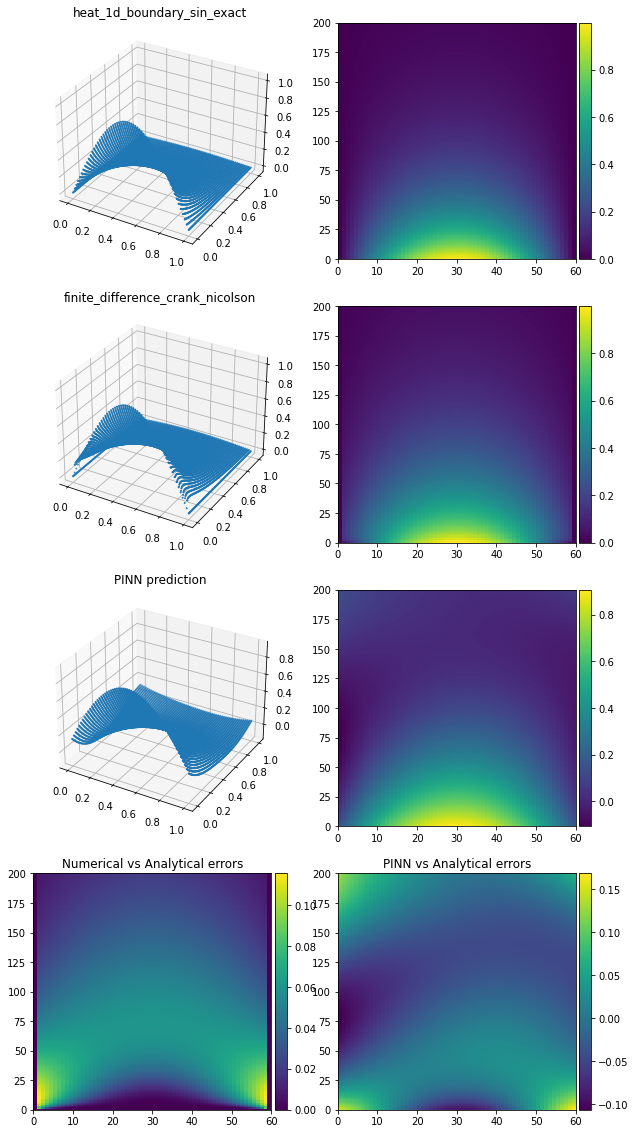

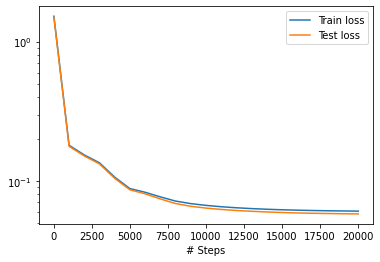

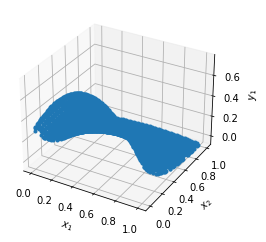

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.03333529184810622
Mean squared error:  0.0016781929532400453
Max error:  0.16795206069946278
Mean residual: 0.4297015
L2 relative error: 0.16298701340868102
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [3]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Hidden layer num" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("hidden layer size")
    ax.set_ylabel("mae")
    ax.title.set_text("Hidden layer sizes vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params = mae_dist_model[3])

# Test 2: Reduce train data (domain and bc) to break solution

In [4]:
num_domains = [2540, 100, 50, 10]
num_bcs = [100, 26, 10, 4]

# # Small test
# num_domains = [10]
# num_bcs = [10, 4]

plot_results = []
mae_dist_models = []
for num_domain in num_domains:
    num_bc_maes = []
    for num_bc in num_bcs:
        test_params = PinnTestParam()
        test_params.d_num_domain = int(num_domain)
        test_params.d_num_boundary = int(num_bc/2)
        test_params.d_num_initial = int(num_bc/2)
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        num_bc_maes.append(mae)
    plot_results.append([num_domain, num_bcs, num_bc_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.030420 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.349958 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.34e-02, 6.86e-02, 8.03e-01]    [2.37e-02, 6.86e-02, 8.03e-01]    []  
1000      [1.04e-03, 9.16e-04, 2.63e-04]    [6.21e-04, 9.16e-04, 2.63e-04]    []  
2000      [2.42e-04, 3.55e-05, 2.85e-05]    [1.77e-04, 3.55e-05, 2.85e-05]    []  
3000      [1.28e-04, 5.90e-06, 7.64e-06]    [9.74e-05, 5.90e-06, 7.64e-06]    []  
4000      [8.39e-05, 3.22e-06, 3.81e-06]    [6.40e-05, 3.22e-06, 3.81e-06]    []  
5000      [5.97e-05, 2.76e-06, 2.69e-06]    [4.62e-05, 2.76e-06, 2.69e-06]    []  
6000      [5.13e-05, 5.00e-06, 8.21e-06]    [4.34e-05, 5.00e-06, 8.21e-06]    []  
7000      [3.51e-05, 1.51e-06, 1.36e-06]    [2.62e-05, 1.51e-06, 1.36e-06]    []  
8000      [5.07e-05, 1.53e-05, 8.14e-06]    [4.46e-05, 1.53e-05, 8.14e-06]    []  
9000      [2.34e-05, 1.13e-06, 7.83e-07]    [1.68e-05, 1.13e-06, 7.83e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.342819 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.58e-01, 6.81e-02, 4.43e-01]    [1.58e-01, 6.81e-02, 4.43e-01]    []  
1000      [1.26e-03, 7.74e-04, 5.42e-04]    [9.46e-04, 7.74e-04, 5.42e-04]    []  
2000      [2.93e-04, 9.07e-05, 4.53e-05]    [2.26e-04, 9.07e-05, 4.53e-05]    []  
3000      [1.15e-04, 1.66e-05, 2.41e-05]    [8.78e-05, 1.66e-05, 2.41e-05]    []  
4000      [5.33e-05, 4.22e-06, 6.07e-06]    [4.03e-05, 4.22e-06, 6.07e-06]    []  
5000      [3.17e-05, 2.65e-06, 3.78e-06]    [2.48e-05, 2.65e-06, 3.78e-06]    []  
6000      [5.72e-05, 2.70e-05, 8.50e-05]    [5.41e-05, 2.70e-05, 8.50e-05]    []  
7000      [3.10e-05, 8.08e-06, 2.75e-05]    [2.84e-05, 8.08e-06, 2.75e-05]    []  
8000      [1.47e-05, 9.60e-07, 1.44e-06]    [1.20e-05, 9.60e-07, 1.44e-06]    []  
9000      [1.28e-05, 4.76e-07, 6.68e-07]    [1.05e-05, 4.76e-07, 6.68e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.373693 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.84e-02, 2.65e-02, 2.86e-01]    [1.85e-02, 2.65e-02, 2.86e-01]    []  
1000      [6.91e-04, 6.56e-05, 5.96e-04]    [5.43e-04, 6.56e-05, 5.96e-04]    []  
2000      [3.99e-04, 5.40e-05, 7.01e-05]    [3.44e-04, 5.40e-05, 7.01e-05]    []  
3000      [1.44e-04, 1.47e-05, 3.19e-05]    [1.09e-04, 1.47e-05, 3.19e-05]    []  
4000      [5.43e-05, 1.00e-05, 1.90e-05]    [3.92e-05, 1.00e-05, 1.90e-05]    []  
5000      [2.87e-05, 4.92e-06, 1.27e-05]    [1.98e-05, 4.92e-06, 1.27e-05]    []  
6000      [1.92e-05, 2.17e-06, 9.10e-06]    [1.32e-05, 2.17e-06, 9.10e-06]    []  
7000      [1.75e-05, 2.68e-06, 8.13e-06]    [1.28e-05, 2.68e-06, 8.13e-06]    []  
8000      [2.43e-05, 3.74e-06, 5.65e-06]    [2.12e-05, 3.74e-06, 5.65e-06]    []  
9000      [1.44e-05, 2.18e-06, 6.47e-06]    [1.10e-05, 2.18e-06, 6.47e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 12:23:01.830814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful N

'compile' took 0.382376 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.86e-03, 1.27e-02, 3.67e-01]    [6.01e-03, 1.27e-02, 3.67e-01]    []  
1000      [2.23e-04, 2.53e-04, 1.13e-04]    [1.99e-04, 2.53e-04, 1.13e-04]    []  
2000      [6.08e-05, 8.95e-08, 7.60e-07]    [5.19e-05, 8.95e-08, 7.60e-07]    []  
3000      [3.29e-05, 3.86e-07, 1.31e-07]    [2.83e-05, 3.86e-07, 1.31e-07]    []  
4000      [2.16e-05, 3.39e-07, 1.01e-07]    [1.87e-05, 3.39e-07, 1.01e-07]    []  
5000      [2.12e-05, 9.43e-05, 6.15e-05]    [1.95e-05, 9.43e-05, 6.15e-05]    []  
6000      [1.16e-05, 6.29e-08, 1.60e-08]    [1.02e-05, 6.29e-08, 1.60e-08]    []  
7000      [9.13e-06, 1.94e-07, 2.37e-07]    [8.00e-06, 1.94e-07, 2.37e-07]    []  
8000      [7.47e-06, 4.53e-09, 3.72e-09]    [6.55e-06, 4.53e-09, 3.72e-09]    []  
9000      [6.36e-06, 1.24e-08, 1.69e-08]    [5.57e-06, 1.24e-08, 1.69e-08]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.388492 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.76e-02, 2.96e-03, 4.76e-01]    [1.82e-02, 2.96e-03, 4.76e-01]    []  
1000      [6.54e-04, 8.36e-04, 2.34e-04]    [7.63e-04, 8.36e-04, 2.34e-04]    []  
2000      [1.11e-04, 3.80e-05, 2.86e-05]    [2.02e-04, 3.80e-05, 2.86e-05]    []  
3000      [6.42e-05, 5.14e-06, 1.33e-05]    [1.45e-04, 5.14e-06, 1.33e-05]    []  
4000      [4.95e-05, 3.31e-06, 8.07e-06]    [1.11e-04, 3.31e-06, 8.07e-06]    []  
5000      [4.08e-05, 2.95e-06, 5.42e-06]    [8.84e-05, 2.95e-06, 5.42e-06]    []  
6000      [3.44e-05, 2.61e-06, 4.00e-06]    [7.21e-05, 2.61e-06, 4.00e-06]    []  
7000      [2.93e-05, 2.29e-06, 3.09e-06]    [5.96e-05, 2.29e-06, 3.09e-06]    []  
8000      [2.52e-05, 2.00e-06, 2.47e-06]    [4.99e-05, 2.00e-06, 2.47e-06]    []  
9000      [2.37e-05, 1.79e-06, 2.22e-06]    [4.40e-05, 1.79e-06, 2.22e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.398829 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.98e-02, 5.39e-02, 3.46e-01]    [8.65e-02, 5.39e-02, 3.46e-01]    []  
1000      [6.57e-04, 7.64e-04, 4.04e-04]    [3.61e-04, 7.64e-04, 4.04e-04]    []  
2000      [1.24e-04, 7.45e-05, 3.49e-05]    [1.12e-04, 7.45e-05, 3.49e-05]    []  
3000      [2.27e-04, 7.37e-05, 3.06e-05]    [2.18e-04, 7.37e-05, 3.06e-05]    []  
4000      [4.36e-05, 5.59e-06, 6.50e-06]    [5.66e-05, 5.59e-06, 6.50e-06]    []  
5000      [3.03e-05, 3.65e-06, 4.51e-06]    [4.56e-05, 3.65e-06, 4.51e-06]    []  
6000      [2.15e-05, 2.35e-06, 3.17e-06]    [3.31e-05, 2.35e-06, 3.17e-06]    []  
7000      [1.46e-05, 1.58e-06, 2.22e-06]    [2.57e-05, 1.58e-06, 2.22e-06]    []  
8000      [1.16e-05, 1.33e-06, 1.59e-06]    [2.21e-05, 1.33e-06, 1.59e-06]    []  
9000      [9.19e-06, 9.04e-07, 1.09e-06]    [1.88e-05, 9.04e-07, 1.09e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.425298 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.06e-01, 6.45e-02, 4.94e-01]    [1.06e-01, 6.45e-02, 4.94e-01]    []  
1000      [1.03e-03, 7.31e-04, 1.55e-03]    [2.55e-03, 7.31e-04, 1.55e-03]    []  
2000      [1.68e-04, 3.46e-06, 1.79e-05]    [1.07e-02, 3.46e-06, 1.79e-05]    []  
3000      [6.98e-05, 7.86e-08, 4.24e-06]    [8.24e-03, 7.86e-08, 4.24e-06]    []  
4000      [3.97e-05, 4.96e-07, 2.49e-06]    [5.76e-03, 4.96e-07, 2.49e-06]    []  
5000      [2.49e-05, 1.00e-07, 1.83e-06]    [4.35e-03, 1.00e-07, 1.83e-06]    []  
6000      [1.68e-05, 5.67e-08, 1.56e-06]    [3.48e-03, 5.67e-08, 1.56e-06]    []  
7000      [1.19e-05, 6.28e-08, 1.37e-06]    [2.90e-03, 6.28e-08, 1.37e-06]    []  
8000      [8.87e-06, 6.00e-08, 1.19e-06]    [2.50e-03, 6.00e-08, 1.19e-06]    []  
9000      [6.88e-06, 7.30e-08, 1.01e-06]    [2.20e-03, 7.31e-08, 1.01e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 12:25:09.125409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUM

'compile' took 0.437772 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.80e-03, 2.40e-02, 3.46e-01]    [1.84e-03, 2.40e-02, 3.46e-01]    []  
1000      [9.69e-05, 2.98e-07, 1.03e-07]    [1.06e-04, 2.98e-07, 1.03e-07]    []  
2000      [3.01e-05, 1.11e-08, 2.32e-08]    [3.42e-05, 1.11e-08, 2.32e-08]    []  
3000      [1.31e-05, 3.28e-09, 4.38e-09]    [1.60e-05, 3.28e-09, 4.41e-09]    []  
4000      [6.86e-06, 4.87e-08, 1.78e-08]    [9.14e-06, 4.86e-08, 1.78e-08]    []  
5000      [4.37e-06, 8.49e-09, 7.80e-09]    [6.13e-06, 8.47e-09, 7.79e-09]    []  
6000      [3.41e-06, 2.84e-10, 4.86e-10]    [4.87e-06, 2.84e-10, 4.89e-10]    []  
7000      [2.91e-06, 2.71e-10, 2.63e-10]    [4.16e-06, 2.74e-10, 2.63e-10]    []  
8000      [2.54e-06, 6.54e-11, 2.66e-10]    [3.66e-06, 6.81e-11, 2.67e-10]    []  
9000      [2.25e-06, 1.11e-07, 8.07e-08]    [3.33e-06, 1.11e-07, 8.06e-08]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 12:25:38.965308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.574553 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.20e-01, 1.04e-01, 4.12e-01]    [3.76e-01, 1.04e-01, 4.12e-01]    []  
1000      [3.42e-03, 2.88e-03, 2.96e-03]    [4.45e-03, 2.88e-03, 2.96e-03]    []  
2000      [2.20e-04, 3.72e-05, 2.58e-05]    [8.40e-04, 3.72e-05, 2.58e-05]    []  
3000      [1.14e-04, 1.55e-05, 1.04e-05]    [5.28e-04, 1.55e-05, 1.04e-05]    []  
4000      [5.49e-05, 9.13e-06, 6.84e-06]    [3.68e-04, 9.13e-06, 6.84e-06]    []  
5000      [4.13e-05, 6.66e-06, 5.19e-06]    [3.10e-04, 6.66e-06, 5.19e-06]    []  
6000      [6.97e-05, 7.27e-06, 4.48e-06]    [3.23e-04, 7.27e-06, 4.48e-06]    []  
7000      [2.86e-05, 4.24e-06, 3.87e-06]    [2.32e-04, 4.24e-06, 3.87e-06]    []  
8000      [2.37e-05, 3.47e-06, 3.58e-06]    [2.12e-04, 3.47e-06, 3.58e-06]    []  
9000      [2.08e-05, 3.03e-06, 3.23e-06]    [1.93e-04, 3.03e-06, 3.23e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.468503 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.81e-02, 6.24e-03, 5.14e-01]    [1.73e-02, 6.24e-03, 5.14e-01]    []  
1000      [6.94e-04, 3.67e-04, 3.43e-04]    [9.51e-04, 3.67e-04, 3.43e-04]    []  
2000      [2.29e-04, 3.56e-05, 2.04e-05]    [4.20e-04, 3.56e-05, 2.04e-05]    []  
3000      [7.47e-05, 8.40e-06, 1.05e-05]    [2.47e-04, 8.40e-06, 1.05e-05]    []  
4000      [7.24e-05, 1.57e-05, 1.04e-05]    [1.96e-04, 1.57e-05, 1.04e-05]    []  
5000      [4.06e-05, 6.17e-06, 9.40e-06]    [1.75e-04, 6.17e-06, 9.40e-06]    []  
6000      [3.18e-05, 5.67e-06, 5.81e-06]    [1.55e-04, 5.67e-06, 5.81e-06]    []  
7000      [2.80e-05, 5.14e-06, 5.47e-06]    [1.44e-04, 5.14e-06, 5.47e-06]    []  
8000      [2.36e-05, 3.51e-06, 4.16e-06]    [1.29e-04, 3.51e-06, 4.16e-06]    []  
9000      [2.66e-05, 1.09e-05, 3.15e-05]    [1.26e-04, 1.09e-05, 3.15e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.481862 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.04e-02, 4.19e-03, 4.64e-01]    [9.69e-03, 4.19e-03, 4.64e-01]    []  
1000      [4.82e-04, 2.36e-04, 7.35e-04]    [3.90e-03, 2.36e-04, 7.35e-04]    []  
2000      [1.53e-04, 7.18e-05, 4.94e-05]    [6.99e-03, 7.18e-05, 4.94e-05]    []  
3000      [7.63e-05, 4.60e-05, 2.49e-05]    [1.10e-02, 4.60e-05, 2.49e-05]    []  
4000      [4.52e-05, 3.08e-05, 1.42e-05]    [1.14e-02, 3.08e-05, 1.42e-05]    []  
5000      [3.31e-05, 1.96e-05, 9.76e-06]    [9.94e-03, 1.96e-05, 9.76e-06]    []  
6000      [5.40e-05, 3.50e-05, 2.21e-05]    [8.39e-03, 3.50e-05, 2.21e-05]    []  
7000      [6.39e-05, 1.25e-05, 6.25e-05]    [7.21e-03, 1.25e-05, 6.25e-05]    []  
8000      [1.67e-05, 5.20e-06, 6.75e-06]    [6.28e-03, 5.20e-06, 6.75e-06]    []  
9000      [2.16e-05, 8.72e-06, 9.39e-06]    [5.58e-03, 8.72e-06, 9.39e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 12:27:12.431186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.509407 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.79e-02, 4.34e-02, 6.88e-01]    [1.71e-02, 4.34e-02, 6.88e-01]    []  
1000      [1.46e-04, 5.19e-07, 7.05e-07]    [1.36e-04, 5.19e-07, 7.05e-07]    []  
2000      [2.42e-05, 9.09e-08, 2.01e-07]    [4.14e-05, 9.08e-08, 2.01e-07]    []  
3000      [1.33e-05, 9.35e-09, 5.38e-09]    [3.09e-05, 9.37e-09, 5.38e-09]    []  
4000      [9.49e-06, 1.20e-05, 1.06e-05]    [2.74e-05, 1.20e-05, 1.06e-05]    []  
5000      [5.22e-06, 1.03e-06, 7.68e-07]    [2.03e-05, 1.03e-06, 7.68e-07]    []  
6000      [3.66e-06, 5.60e-08, 6.91e-08]    [1.81e-05, 5.59e-08, 6.91e-08]    []  
7000      [2.80e-06, 3.55e-10, 9.66e-10]    [1.59e-05, 3.60e-10, 9.69e-10]    []  
8000      [5.47e-06, 5.31e-05, 4.72e-05]    [1.53e-05, 5.31e-05, 4.72e-05]    []  
9000      [2.03e-06, 1.52e-10, 1.23e-09]    [1.26e-05, 1.53e-10, 1.22e-09]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.504323 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.40e-02, 6.45e-03, 5.13e-01]    [1.81e-02, 6.45e-03, 5.13e-01]    []  
1000      [1.88e-03, 1.94e-03, 2.80e-03]    [1.18e-02, 1.94e-03, 2.80e-03]    []  
2000      [4.81e-04, 4.97e-04, 5.93e-04]    [8.96e-03, 4.97e-04, 5.93e-04]    []  
3000      [2.08e-04, 1.37e-04, 1.17e-04]    [6.02e-03, 1.37e-04, 1.17e-04]    []  
4000      [1.44e-04, 7.88e-05, 8.33e-05]    [5.85e-03, 7.88e-05, 8.33e-05]    []  
5000      [1.25e-04, 6.69e-05, 6.27e-05]    [5.54e-03, 6.69e-05, 6.27e-05]    []  
6000      [1.30e-04, 4.45e-05, 5.10e-05]    [4.95e-03, 4.45e-05, 5.10e-05]    []  
7000      [9.33e-05, 3.34e-05, 3.75e-05]    [4.64e-03, 3.34e-05, 3.75e-05]    []  
8000      [8.50e-05, 2.63e-05, 2.98e-05]    [4.23e-03, 2.63e-05, 2.98e-05]    []  
9000      [7.55e-05, 2.08e-05, 2.52e-05]    [3.83e-03, 2.08e-05, 2.52e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.536125 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.59e-02, 1.79e-01, 2.05e-01]    [2.94e-02, 1.79e-01, 2.05e-01]    []  
1000      [4.90e-04, 8.71e-05, 1.54e-04]    [7.74e-03, 8.71e-05, 1.54e-04]    []  
2000      [6.20e-05, 2.46e-05, 1.79e-05]    [2.25e-03, 2.46e-05, 1.80e-05]    []  
3000      [4.31e-05, 1.35e-05, 9.75e-06]    [1.60e-03, 1.35e-05, 9.75e-06]    []  
4000      [3.66e-05, 7.84e-06, 5.41e-06]    [1.53e-03, 7.84e-06, 5.41e-06]    []  
5000      [3.20e-05, 4.66e-06, 2.99e-06]    [1.54e-03, 4.66e-06, 2.99e-06]    []  
6000      [3.72e-05, 3.63e-06, 1.83e-06]    [1.56e-03, 3.63e-06, 1.83e-06]    []  
7000      [2.47e-05, 1.94e-06, 9.47e-07]    [1.65e-03, 1.94e-06, 9.47e-07]    []  
8000      [2.15e-05, 1.30e-06, 5.11e-07]    [1.69e-03, 1.30e-06, 5.11e-07]    []  
9000      [1.90e-05, 9.59e-07, 2.79e-07]    [1.72e-03, 9.59e-07, 2.79e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.543716 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.99e-02, 5.29e-02, 6.07e-01]    [9.57e-02, 5.29e-02, 6.07e-01]    []  
1000      [1.17e-03, 2.59e-03, 2.46e-03]    [3.77e-02, 2.59e-03, 2.46e-03]    []  
2000      [2.51e-04, 2.56e-04, 2.75e-05]    [2.48e-01, 2.56e-04, 2.74e-05]    []  
3000      [4.55e-05, 4.25e-05, 1.35e-05]    [3.26e-01, 4.25e-05, 1.35e-05]    []  
4000      [8.81e-06, 7.34e-06, 1.81e-06]    [3.62e-01, 7.34e-06, 1.81e-06]    []  
5000      [1.04e-06, 3.27e-06, 4.37e-07]    [3.73e-01, 3.27e-06, 4.37e-07]    []  
6000      [7.10e-05, 1.09e-05, 1.62e-06]    [3.75e-01, 1.09e-05, 1.62e-06]    []  
7000      [1.48e-07, 2.14e-06, 2.55e-07]    [3.76e-01, 2.14e-06, 2.55e-07]    []  
8000      [5.00e-06, 2.00e-06, 7.79e-07]    [3.76e-01, 2.00e-06, 7.79e-07]    []  
9000      [4.26e-08, 1.58e-06, 2.63e-07]    [3.77e-01, 1.58e-06, 2.63e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 12:29:26.886929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA 

'compile' took 0.559761 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.11e-03, 1.05e-04, 5.36e-01]    [7.76e-03, 1.05e-04, 5.36e-01]    []  
1000      [5.86e-05, 1.51e-05, 9.15e-06]    [1.04e-04, 1.51e-05, 9.15e-06]    []  
2000      [3.14e-06, 3.08e-09, 7.36e-09]    [5.59e-05, 3.09e-09, 7.34e-09]    []  
3000      [2.25e-06, 1.07e-08, 2.08e-08]    [6.12e-05, 1.07e-08, 2.08e-08]    []  
4000      [8.05e-06, 2.58e-05, 1.77e-05]    [7.55e-05, 2.58e-05, 1.77e-05]    []  
5000      [1.39e-06, 1.14e-09, 2.24e-09]    [6.83e-05, 1.13e-09, 2.23e-09]    []  
6000      [1.13e-06, 2.66e-09, 2.04e-09]    [7.56e-05, 2.67e-09, 2.04e-09]    []  
7000      [9.27e-07, 3.14e-09, 5.09e-09]    [8.40e-05, 3.15e-09, 5.12e-09]    []  
8000      [8.13e-07, 5.57e-08, 4.59e-08]    [9.69e-05, 5.57e-08, 4.59e-08]    []  
9000      [1.97e-06, 5.64e-06, 9.64e-06]    [1.04e-04, 5.64e-06, 9.64e-06]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20031     [4.41e-07, 4.09e-10, 1.02e-09]    [4.64e-04, 4.13e-10, 1.03e-09]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 1
  Number of functions evaluations: 15
20046     [4.41e-07, 4.09e-10, 1.02e-09]    [4.64e-04, 4.13e-10, 1.03e-09]    []  

Best model at step 20031:
  train loss: 4.43e-07
  test loss: 4.64e-04
  test metric: []

'train' took 4.182049 s

PINN prediction: Average time with 25 tries: 0.0586 seconds


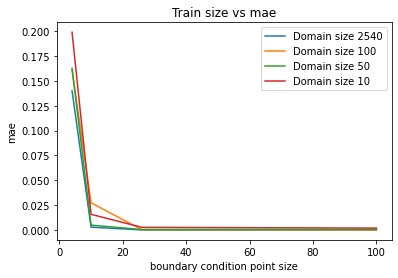

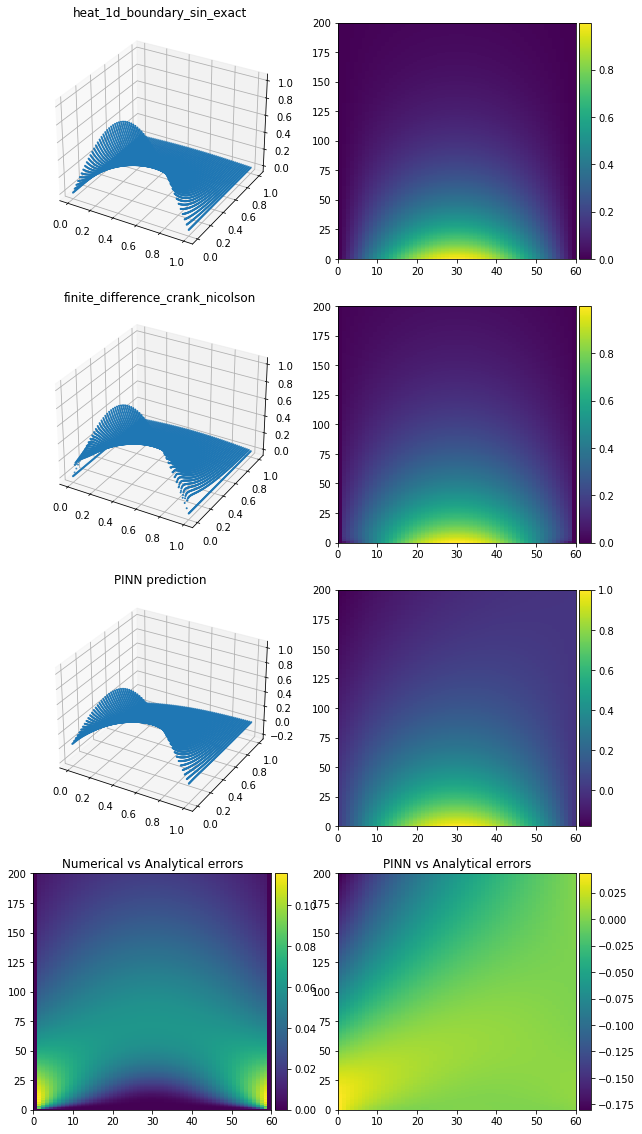

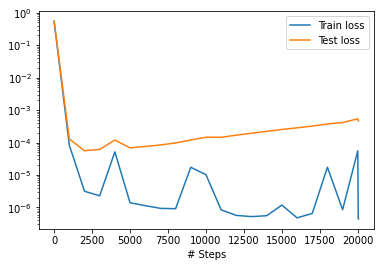

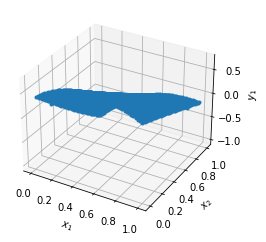

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  0.03987500843487987
Mean squared error:  0.0020459501475140825
Max error:  0.11549116080982058
--- PINN vs Analytical Report ---
Mean absolute error:  0.027406865295017225
Mean squared error:  0.002042490140365456
Max error:  0.18008285760879517
Mean residual: 0.38180423
L2 relative error: 0.17980925414566185
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 100
d_num_boundary: 5
d_num_initial: 5
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [5]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Domain size" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("boundary condition point size")
    ax.set_ylabel("mae")
    ax.title.set_text("Train size vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params=mae_dist_model[3])
